In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

# solve LP
m = GEKKO(remote=False)
x1,x2 = m.Array(m.Var,2,lb=0)
m.Equations([-1*x1+2*x2<=6,-2*x1+x2>=-6,x1+x2>=3,x1>=0,x2>=0])
m.Maximize(x1/2+x2)
m.solve(disp=False)
x1opt = x1.value[0]; x2opt = x2.value[0]
print('x1 = ',round(x1opt,2))
print('x2 = ',round(x2opt,2))
print('z = ',round(x1opt/2+x2opt,3))

x1 =  6.0
x2 =  6.0
z =  9.0


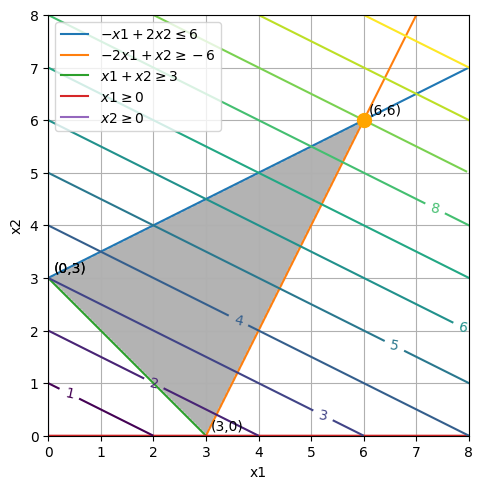

In [16]:
# visualize solution
g = np.linspace(0,10,200)
x,y = np.meshgrid(g,g)
obj = x/2+y
plt.imshow(((-x+2*y<=6)&(-2*x+y>=-6)&(x+y>=3)&(x>=0)&(y>=0)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(0, 8, 2000)
y0 = 3+0.5*x0   # 6*x+4*y<=24
y1 = -6+2*x0   # x+2*y<=6
y2 = 3 - x0      # -x+y<=1
y3 = x0*0 # y <= 2

plt.plot(x0, y0, label=r'$-x1+2x2\leq6$')
plt.plot(x0, y1, label=r'$-2x1+x2\geq-6$')
plt.plot(x0, y2, label=r'$x1+x2\geq3$')

plt.plot(x0, y3, label=r'$x1\geq0$')
plt.plot([0,0],[0,8], label=r'$x2\geq0$')
xv = [0,round(x1opt),3,0]; yv = [3,round(x2opt),0,3]
#plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
# objective contours
CS = plt.contour(x,y,obj,np.arange(1,12))
plt.clabel(CS, inline=1, fontsize=10)
# optimal point
plt.plot([x1opt],[x2opt],marker='o',color='orange',markersize=10)
plt.xlim(0,8); plt.ylim(0,8); plt.grid(); plt.tight_layout()
plt.legend(loc=2); plt.xlabel('x1'); plt.ylabel('x2')
plt.savefig('plot.png',dpi=300)
plt.show()